In [5]:
import pandas as pd 
%matplotlib inline

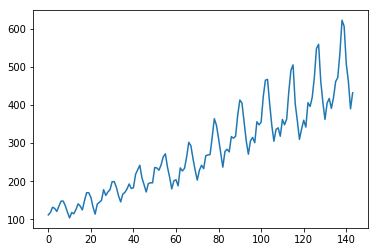

In [6]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [7]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [8]:
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

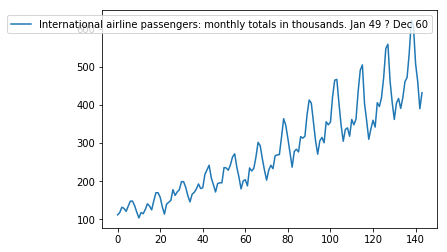

array([[ 0.        ],
       [ 0.09983342],
       [ 0.19866933],
       [ 0.29552021],
       [ 0.38941834],
       [ 0.47942554],
       [ 0.56464247],
       [ 0.64421769],
       [ 0.71735609],
       [ 0.78332691],
       [ 0.84147098],
       [ 0.89120736],
       [ 0.93203909],
       [ 0.96355819],
       [ 0.98544973],
       [ 0.99749499],
       [ 0.9995736 ],
       [ 0.99166481],
       [ 0.97384763],
       [ 0.94630009],
       [ 0.90929743],
       [ 0.86320937],
       [ 0.8084964 ],
       [ 0.74570521],
       [ 0.67546318],
       [ 0.59847214],
       [ 0.51550137],
       [ 0.42737988],
       [ 0.33498815],
       [ 0.23924933],
       [ 0.14112001],
       [ 0.04158066],
       [-0.05837414],
       [-0.15774569],
       [-0.2555411 ],
       [-0.35078323],
       [-0.44252044],
       [-0.52983614],
       [-0.61185789],
       [-0.68776616],
       [-0.7568025 ],
       [-0.81827711],
       [-0.87157577],
       [-0.91616594],
       [-0.95160207],
       [-0

In [80]:
dataframe.plot()
plt.show()
sin = np.sin(0.1*np.arange(0, 140)).reshape(-1,1)

Train Score: 17.31 RMSE
Test Score: 83.50 RMSE


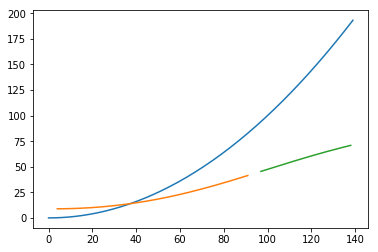

Train Score: 0.67 RMSE
Test Score: 20.04 RMSE


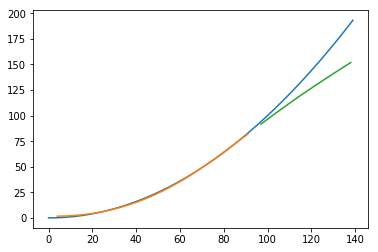

Train Score: 0.59 RMSE
Test Score: 21.04 RMSE


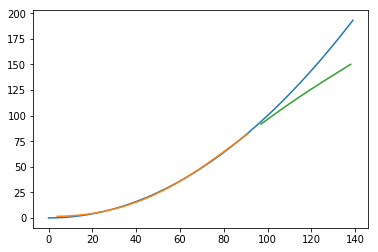

Train Score: 0.56 RMSE
Test Score: 22.60 RMSE


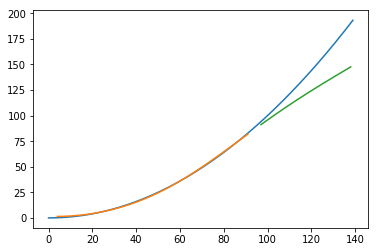

Train Score: 0.54 RMSE
Test Score: 23.53 RMSE


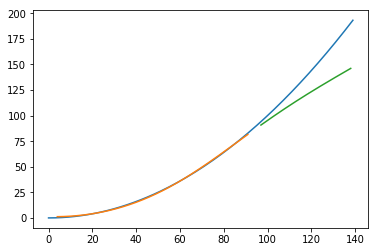

Train Score: 0.54 RMSE
Test Score: 23.93 RMSE


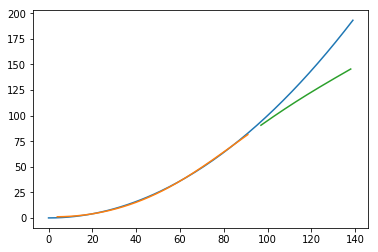

Train Score: 0.55 RMSE
Test Score: 23.61 RMSE


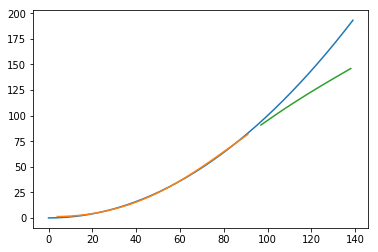

Train Score: 0.52 RMSE
Test Score: 23.51 RMSE


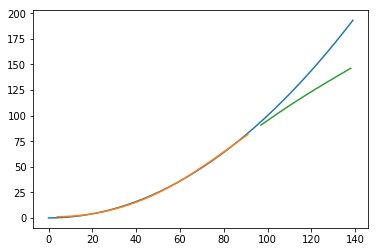

Train Score: 0.52 RMSE
Test Score: 23.57 RMSE


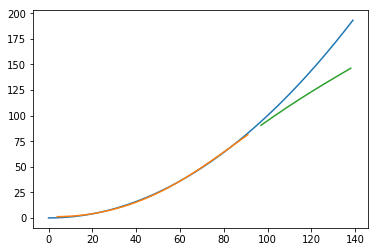

Train Score: 0.53 RMSE
Test Score: 22.51 RMSE


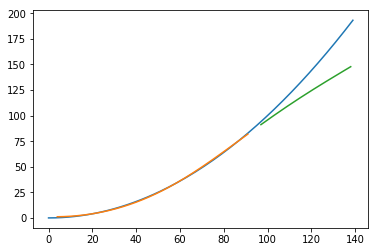

In [101]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
def ImportDataSet(look_back = 1, dataType='sin'):
    if dataType == 'airline':
        dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
        dataset = dataframe.values
        dataset = dataset.astype('float32')
    if dataType == 'sin':
        dataset = np.sin(0.1*np.arange(0, 140)).reshape(-1,1)
    if dataType == 'parabola':
        dataset =((0.1*np.arange(0, 140))**2).reshape(-1,1)
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    # split into train and test sets
    train_size = int(len(dataset) * 0.67)
    test_size = len(dataset) - train_size

    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    # reshape into X=t and Y=t+1
    
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    return dataset, trainX, testX, trainY, testY, scaler, look_back

# create and fit the LSTM network
def GenerateMdel(trainX, trainY, testX, look_back):
    model = Sequential()
    model.add(LSTM(1, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def OneItteration(model):
    model.fit(trainX, trainY, epochs=1, batch_size=2, verbose=0)
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    return trainPredict, testPredict, model

dataset, trainX, testX, trainY\
,testY, scaler, look_back = ImportDataSet(look_back=4, dataType='parabola')
model = GenerateMdel(trainX, trainY, testX, look_back)
learningCurve = []
for el in range(200):
    trainPredict, testPredict, model = OneItteration(model)
    learningCurve.append(PlotResults(dataset, trainX, testX, trainY,
                    testY, scaler, look_back, trainPredict,
                testPredict, show=(el%20 == 0)))

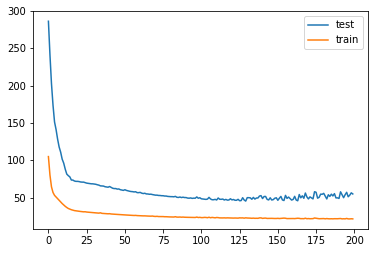

In [98]:
import numpy as np
plt.plot(np.array(learningCurve)[:,0], label='test')
plt.plot(np.array(learningCurve)[:,1], label='train')
plt.legend(loc='best')

In [89]:
# invert predictions
def PlotResults(dataset, trainX, testX, trainY, testY, scaler, look_back, trainPredict, testPredict, show=True):
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
        # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    if show:
        print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    if show:
        print('Test Score: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
    # plot baseline and predictions
    if show:    
        plt.plot(scaler.inverse_transform(dataset))
        plt.plot(trainPredictPlot)
        plt.plot(testPredictPlot)
        plt.show()
    return testScore, trainScore